In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
import math
import utils
from collections import deque
import random
import seaborn as sns
from sklearn import preprocessing
from keras.layers import Dense, Dropout, LSTM, GRU, BatchNormalization
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
import time
import data_manipulator
import create_model
import data_reader
import finance_calculator
import latex
from matplotlib.ticker import MaxNLocator

sns.set_theme()
sns.set_style("whitegrid", {'grid.linestyle': '--'})
seq_col_brew = sns.color_palette("flag_r", 4)
sns.set_palette(seq_col_brew)
plt.rcParams["figure.figsize"] = (7,4)
plt.rcParams["axes.titlesize"] = 22
plt.rcParams["axes.labelsize"] = 18
plt.rcParams["legend.fontsize"] = 13
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Helvetica'
plt.rcParams['savefig.dpi'] = 1200
tf.keras.utils.set_random_seed(2)

%reload_ext autoreload
%autoreload 3
%config InteractiveShell.ast_node_interactivity = 'all'
%config InlineBackend.figure_format = 'retina'


In [83]:
model_load_rx1 = keras.models.load_model(f'models/02.08.2145-rx1-60-1-gru-sigmoid-30-8.hdf5')
model_load_ty1 = keras.models.load_model(f'models/02.08.2216-ty1-60-1-gru-sigmoid-30-8.hdf5')
model_load_oe1 = keras.models.load_model(f'models/02.08.2245-oe1-60-1-gru-sigmoid-30-8.hdf5')
model_load_du1 = keras.models.load_model(f'models/02.08.2310-du1-60-1-gru-sigmoid-30-8.hdf5')
dataset_rx1 = data_reader.credit_selector('rx1')
dataset_ty1 = data_reader.credit_selector('ty1')
dataset_oe1 = data_reader.credit_selector('oe1')
dataset_du1 = data_reader.credit_selector('du1')
model_test_rx1 = data_manipulator.splitter(dataset_rx1, cutoff=0.10)[1]
model_test_ty1 = data_manipulator.splitter(dataset_ty1, cutoff=0.10)[1]
model_test_oe1 = data_manipulator.splitter(dataset_oe1, cutoff=0.10)[1]
model_test_du1 = data_manipulator.splitter(dataset_du1, cutoff=0.10)[1]
return_pred_rx1 = utils.getReturnAndPred_sigmoidModel(model_test_rx1, 60+1, 'rx1', model_load_rx1)
return_pred_ty1 = utils.getReturnAndPred_sigmoidModel(model_test_ty1, 60+1, 'ty1', model_load_ty1)
return_pred_oe1 = utils.getReturnAndPred_sigmoidModel(model_test_oe1, 60+1, 'oe1', model_load_oe1)
return_pred_du1 = utils.getReturnAndPred_sigmoidModel(model_test_du1, 60+1, 'du1', model_load_du1)


Pred #75: [0.4861098]
Pred #150: [0.505882]
Pred #225: [0.4712104]
Pred #300: [0.48160738]
Pred #375: [0.49104786]
Pred #450: [0.4832633]
Pred #525: [0.5304792]
Pred #75: [0.47576642]
Pred #150: [0.48037943]
Pred #225: [0.52637064]
Pred #300: [0.49442548]
Pred #375: [0.46875578]
Pred #450: [0.509699]
Pred #75: [0.5049301]
Pred #150: [0.48145038]
Pred #225: [0.48714256]
Pred #300: [0.50070965]
Pred #375: [0.4872138]
Pred #450: [0.4832477]
Pred #525: [0.5058516]
Pred #75: [0.47961885]
Pred #150: [0.5094383]
Pred #225: [0.51253915]
Pred #300: [0.52952445]
Pred #375: [0.5488321]
Pred #450: [0.5639099]
Pred #525: [0.50110865]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


461
461
461
461


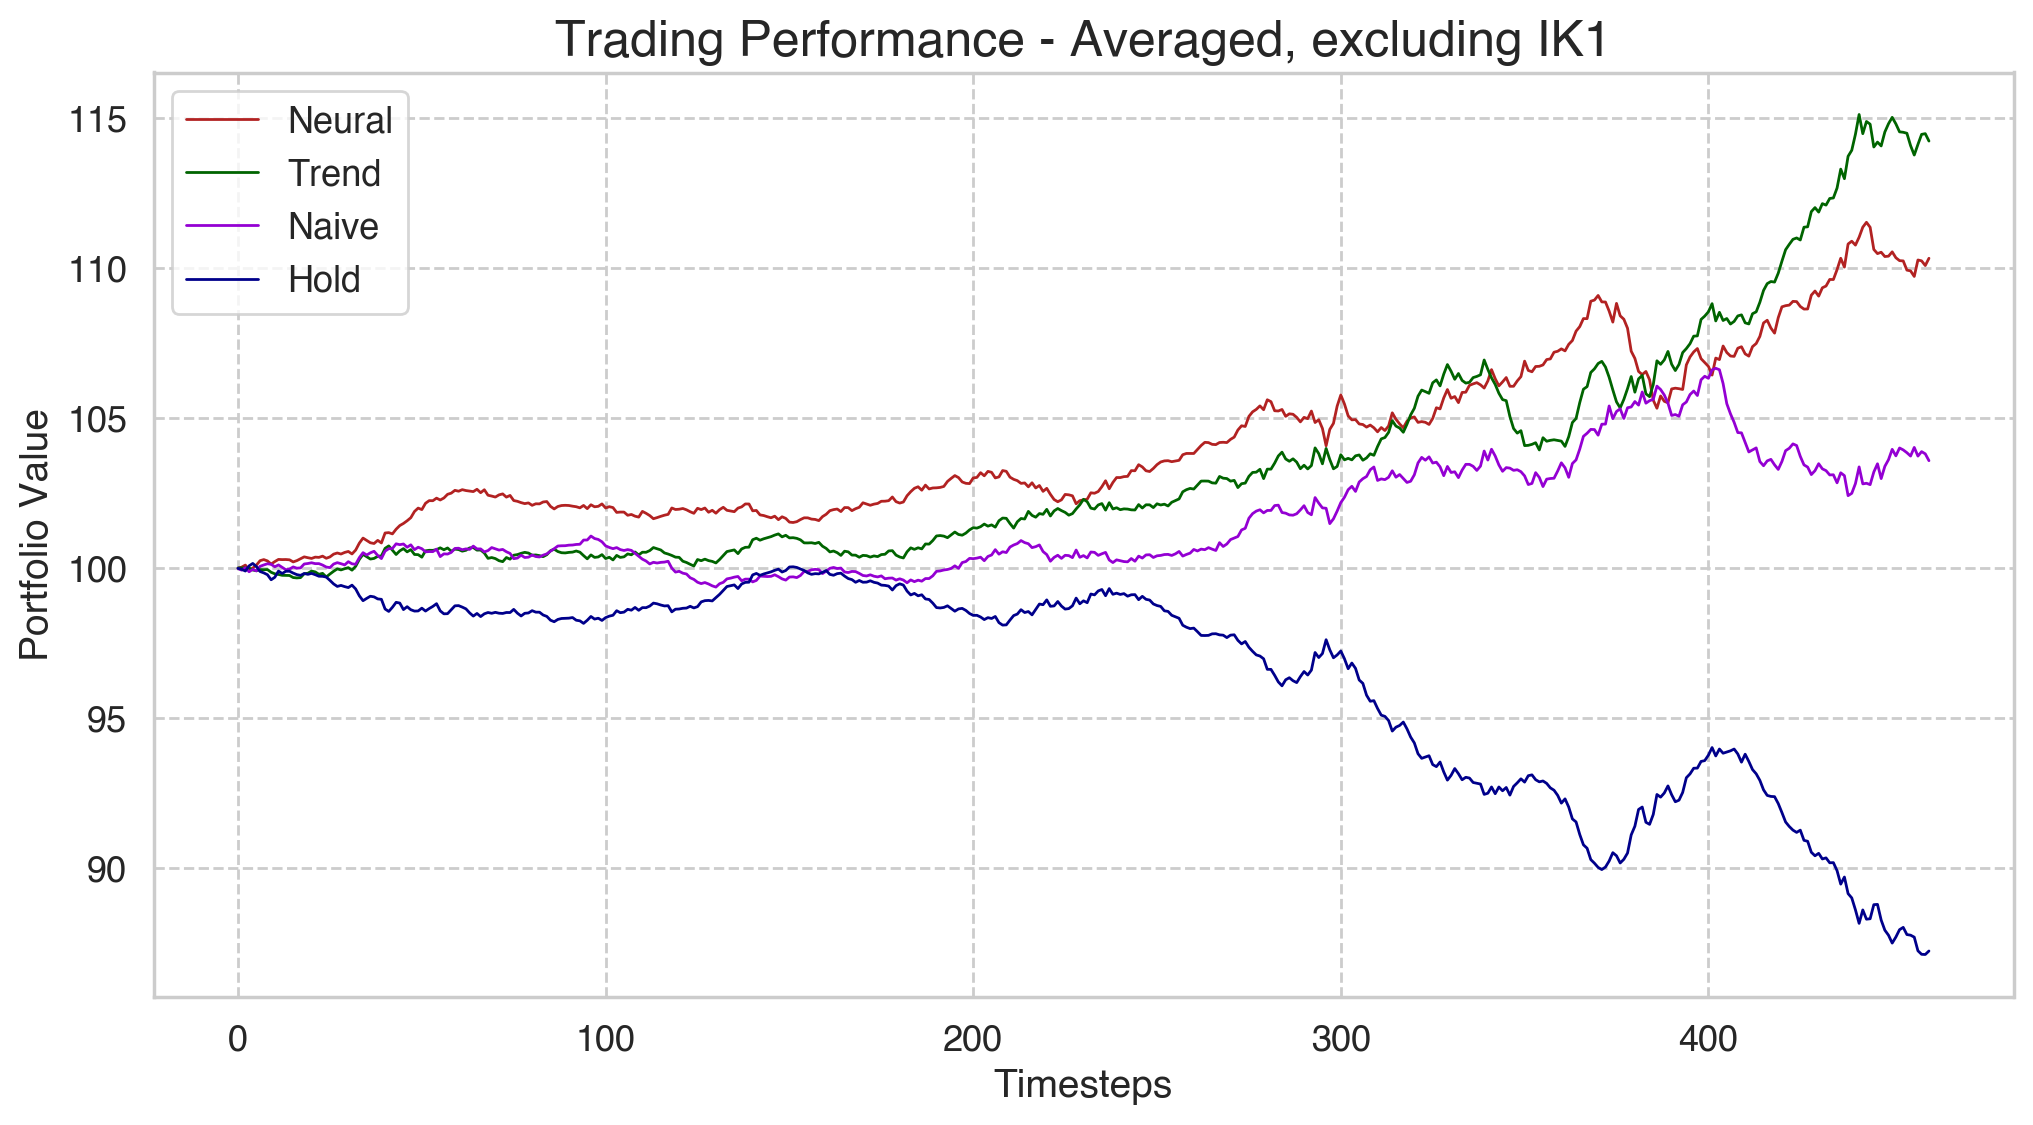

In [113]:
treshhold = 0.50           # 1 = always short, 0 = always long. mean ~ 50/50 short/long
portfolio_value_neural_rx1 = finance_calculator.portfolio_value_neural(return_pred_rx1, treshhold)
portfolio_value_neural_ty1 = finance_calculator.portfolio_value_neural(return_pred_ty1, treshhold)
portfolio_value_neural_oe1 = finance_calculator.portfolio_value_neural(return_pred_oe1, treshhold)
portfolio_value_neural_du1 = finance_calculator.portfolio_value_neural(return_pred_du1, treshhold)
minlen = min(len(portfolio_value_neural_rx1),len(portfolio_value_neural_ty1), len(portfolio_value_neural_oe1), len(portfolio_value_neural_du1))
print(minlen)
portfolio_value_neural_avg = (portfolio_value_neural_rx1[7:minlen+7] + portfolio_value_neural_ty1[0:minlen] + portfolio_value_neural_oe1[0:minlen] + portfolio_value_neural_du1[0:minlen]) / 4

nbr_previous_days_trend = 10
portfolio_value_trend_rx1 = finance_calculator.portfolio_value_trend(return_pred_rx1, nbr_previous_days_trend)
portfolio_value_trend_ty1 = finance_calculator.portfolio_value_trend(return_pred_ty1, nbr_previous_days_trend)
portfolio_value_trend_oe1 = finance_calculator.portfolio_value_trend(return_pred_oe1, nbr_previous_days_trend)
portfolio_value_trend_du1 = finance_calculator.portfolio_value_trend(return_pred_du1, nbr_previous_days_trend)
minlen = min(len(portfolio_value_trend_rx1),len(portfolio_value_trend_ty1), len(portfolio_value_trend_oe1), len(portfolio_value_trend_du1))
print(minlen)
portfolio_value_trend_avg = (portfolio_value_trend_rx1[7:minlen+7] + portfolio_value_trend_ty1[0:minlen] + portfolio_value_trend_oe1[0:minlen] + portfolio_value_trend_du1[0:minlen]) / 4

portfolio_value_naive_rx1 = finance_calculator.portfolio_value_naive(return_pred_rx1)
portfolio_value_naive_ty1 = finance_calculator.portfolio_value_naive(return_pred_ty1)
portfolio_value_naive_oe1 = finance_calculator.portfolio_value_naive(return_pred_oe1)
portfolio_value_naive_du1 = finance_calculator.portfolio_value_naive(return_pred_du1)
minlen = min(len(portfolio_value_naive_rx1),len(portfolio_value_naive_ty1), len(portfolio_value_naive_oe1), len(portfolio_value_naive_du1))
print(minlen)
portfolio_value_naive_avg = (portfolio_value_naive_rx1[7:minlen+7] + portfolio_value_naive_ty1[0:minlen] + portfolio_value_naive_oe1[0:minlen] + portfolio_value_naive_du1[0:minlen]) / 4

portfolio_value_hold_rx1 = finance_calculator.portfolio_value_hold(return_pred_rx1)
portfolio_value_hold_ty1 = finance_calculator.portfolio_value_hold(return_pred_ty1)
portfolio_value_hold_oe1 = finance_calculator.portfolio_value_hold(return_pred_oe1)
portfolio_value_hold_du1 = finance_calculator.portfolio_value_hold(return_pred_du1)
minlen = min(len(portfolio_value_hold_rx1),len(portfolio_value_hold_ty1), len(portfolio_value_hold_oe1), len(portfolio_value_hold_du1))
print(minlen)
portfolio_value_hold_avg = (portfolio_value_hold_rx1[7:minlen+7] + portfolio_value_hold_ty1[0:minlen] + portfolio_value_hold_oe1[0:minlen] + portfolio_value_hold_du1[0:minlen]) / 4

# Plots
fig1, axs1 = plt.subplots(1,1, figsize=(12,6))
plt.tick_params(axis='both', which='major', labelsize=13)
fig1 = plt.plot(portfolio_value_neural_avg, color='firebrick', linestyle='-', linewidth='1')
fig1 = plt.plot(portfolio_value_trend_avg, color='darkgreen', linestyle='-', linewidth='1')
fig1 = plt.plot(portfolio_value_naive_avg, color='darkviolet', linestyle='-', linewidth='1')
fig1 = plt.plot(portfolio_value_hold_avg, color='darkblue', linestyle='-', linewidth='1')
axs1.yaxis.set_major_locator(MaxNLocator(7)) 
axs1 = plt.title('Trading Performance - Averaged, excluding IK1', size=18)
axs1 = plt.ylabel('Portfolio Value', size=14)
axs1 = plt.xlabel('Timesteps', size=14)
axs1 = plt.legend(['Neural', 'Trend', 'Naive', 'Hold'], loc='upper left')
save_loc = f'plots/02.09.0021-all-60-1-gru-sigmoid-30-8-trading_performance.eps'
plt.savefig(save_loc, dpi=1200, bbox_inches = "tight")